## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Read Data

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data cleanning

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Drop and fill nulls

In [7]:
df.drop(['company'], axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [10]:
df.shape

(102894, 31)

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
df.replace({'Resort Hotel':0, 'City Hotel':1}, inplace= True)
df.head(2)

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1465327655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Resort Hotel':0, 'City Hotel':1}, inplace= True)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [16]:
df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26], dtype=int64)

In [17]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [18]:
df.replace({'January':1,'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}, inplace= True)
df['arrival_date_month'].unique()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1855899888.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'January':1,'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}, inplace= True)


array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [22]:
df.replace({'BB':0, 'FB':1, 'HB':2, 'SC':3, 'Undefined':4}, inplace= True)
df['meal'].unique()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\3865538642.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'BB':0, 'FB':1, 'HB':2, 'SC':3, 'Undefined':4}, inplace= True)


array([0, 1, 2, 3, 4], dtype=int64)

In [23]:
country_list = df['country'].unique()
country_list

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN',
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM',
       'JPN', 'LKA', 'CUB', 'CMR', 'MUS', 'COM', 'SUR', 'UGA', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'ISL', 'ECU', 'NPL', 'CPV', 'BHS',
       'MAC', 'TGO', 'TWN', 'DJI', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA',
       'KHM', 'MCO', 

In [24]:
countryDict={}

for idx, i in enumerate(country_list):
    # print(i,idx)
    countryDict[i] = idx

countryDict

{'GBR': 0,
 'PRT': 1,
 'USA': 2,
 'ESP': 3,
 'IRL': 4,
 'ROU': 5,
 'NOR': 6,
 'OMN': 7,
 'ARG': 8,
 'POL': 9,
 'DEU': 10,
 'FRA': 11,
 'BEL': 12,
 'CHE': 13,
 'CN': 14,
 'GRC': 15,
 'ITA': 16,
 'DNK': 17,
 'RUS': 18,
 'SWE': 19,
 'AUS': 20,
 'EST': 21,
 'CZE': 22,
 'BRA': 23,
 'FIN': 24,
 'MOZ': 25,
 'BWA': 26,
 'LUX': 27,
 'NLD': 28,
 'SVN': 29,
 'ALB': 30,
 'IND': 31,
 'CHN': 32,
 'MEX': 33,
 'MAR': 34,
 'UKR': 35,
 'LVA': 36,
 'PRI': 37,
 'SRB': 38,
 'CHL': 39,
 'AUT': 40,
 'BLR': 41,
 'LTU': 42,
 'TUR': 43,
 'ZAF': 44,
 'CYM': 45,
 'ZMB': 46,
 'ZWE': 47,
 'DZA': 48,
 'KOR': 49,
 'CRI': 50,
 'HUN': 51,
 'ARE': 52,
 'TUN': 53,
 'JAM': 54,
 'HRV': 55,
 'HKG': 56,
 'ISR': 57,
 'IRN': 58,
 'GEO': 59,
 'AND': 60,
 'GIB': 61,
 'URY': 62,
 'JEY': 63,
 'CAF': 64,
 'CYP': 65,
 'COL': 66,
 'GGY': 67,
 'KWT': 68,
 'NGA': 69,
 'MDV': 70,
 'VEN': 71,
 'SVK': 72,
 'AGO': 73,
 'FJI': 74,
 'KAZ': 75,
 'PAK': 76,
 'IDN': 77,
 'LBN': 78,
 'PHL': 79,
 'SEN': 80,
 'SYC': 81,
 'AZE': 82,
 'BHR': 83,
 'N

In [25]:
df['country'].replace(countryDict, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\4252643163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace(countryDict, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\4252643163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'].repla

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [26]:
df['market_segment'].unique()

array(['Corporate', 'Online TA', 'Direct', 'Offline TA/TO', 'Groups',
       'Complementary', 'Aviation'], dtype=object)

In [27]:
df['market_segment'].replace({'Corporate':0, 'Online TA':1, 'Direct':2, 'Offline TA/TO':3, 'Groups':4, 'Complementary':5, 'Aviation':6}, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1862415499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['market_segment'].replace({'Corporate':0, 'Online TA':1, 'Direct':2, 'Offline TA/TO':3, 'Groups':4, 'Complementary':5, 'Aviation':6}, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1862415499.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [28]:
df['distribution_channel'].unique()

array(['Corporate', 'TA/TO', 'Direct', 'GDS'], dtype=object)

In [29]:
df['distribution_channel'].replace({'Corporate':0, 'TA/TO':1, 'Direct':2, 'GDS':3}, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\3033694221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['distribution_channel'].replace({'Corporate':0, 'TA/TO':1, 'Direct':2, 'GDS':3}, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\3033694221.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [30]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [31]:
df['deposit_type'].replace({'No Deposit':0, 'Refundable':1, 'Non Refund':2}, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1328702811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deposit_type'].replace({'No Deposit':0, 'Refundable':1, 'Non Refund':2}, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\1328702811.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,A,A,0,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,A,A,0,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,A,A,0,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,C,C,0,0,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,A,A,0,0,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [32]:
roomType = {'A':0, 'C':1, 'D':2, 'E':3, 'G':4, 'F':5, 'I':6, 'B':7, 'H':8, 'K':9}

In [33]:
df['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [34]:
df['assigned_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'K'], dtype=object)

In [35]:
df['reserved_room_type'].replace(roomType, inplace=True)
df['assigned_room_type'].replace(roomType, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\3125734992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reserved_room_type'].replace(roomType, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\3125734992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['reserve

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [36]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [37]:
df['customer_type'].replace({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3}, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\4103172749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_type'].replace({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3}, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\4103172749.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,0,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,0,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,0,82.0,0,1,Canceled,2015-05-06


In [38]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [39]:
df['reservation_status'].replace({'Check-Out':0, 'Canceled':1, 'No-Show':2}, inplace=True)
df.head()

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\2664372030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reservation_status'].replace({'Check-Out':0, 'Canceled':1, 'No-Show':2}, inplace=True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_10888\2664372030.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,0,75.0,0,0,0,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,0,103.0,0,1,0,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,0,82.0,0,1,1,2015-05-06


### Create new bins

In [40]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102894 non-null  int64         
 1   is_canceled                     102894 non-null  int64         
 2   lead_time                       102894 non-null  int64         
 3   arrival_date_year               102894 non-null  int64         
 4   arrival_date_month              102894 non-null  int64         
 5   arrival_date_week_number        102894 non-null  int64         
 6   arrival_date_day_of_month       102894 non-null  int64         
 7   stays_in_weekend_nights         102894 non-null  int64         
 8   stays_in_week_nights            102894 non-null  int64         
 9   adults                          102894 non-null  int64         
 10  children                        102894 non-null  float64     

In [42]:
# Create new columns
df['reservation_status_date_day'] = df['reservation_status_date'].dt.day
df['reservation_status_date_month'] = df['reservation_status_date'].dt.month
df['reservation_status_date_year'] = df['reservation_status_date'].dt.year

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,0,75.0,0,0,0,2015-07-02,2,7,2015
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,2015-07-03,3,7,2015
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,2015-07-03,3,7,2015
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,0,103.0,0,1,0,2015-07-03,3,7,2015
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,0,82.0,0,1,1,2015-05-06,6,5,2015


In [43]:
df.drop(['reservation_status_date'], axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,0,75.0,0,0,0,2,7,2015
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,3,7,2015
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,3,7,2015
7,0,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,0,103.0,0,1,0,3,7,2015
8,0,1,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,0,82.0,0,1,1,6,5,2015


In [44]:
dfCorr = df.corr()

In [45]:
dfCorr.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'}) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
hotel,1.000000,0.116237,0.070860,0.023912,-0.001759,-0.001085,0.008135,-0.231985,-0.280023,-0.023438,-0.058166,-0.048754,0.013702,0.149624,0.054557,-0.059467,-0.050448,-0.007864,-0.037883,-0.212922,-0.220366,-0.059643,0.169221,-0.790229,0.074329,0.041554,0.061281,-0.213978,-0.072150,0.115115,-0.013861,-0.003609,-0.004765
is_canceled,0.116237,1.000000,0.277666,0.004561,0.006457,0.004172,-0.005468,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.030191,-0.102247,0.132549,-0.098182,-0.029913,0.117983,-0.042589,-0.054190,-0.151458,-0.131714,0.461968,-0.081939,0.052475,-0.143951,0.023284,-0.188298,-0.257934,0.981517,-0.039412,-0.083768,-0.129458
lead_time,0.070860,0.277666,1.000000,0.041082,0.125228,0.120155,-0.003472,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.030297,-0.112444,0.374826,-0.068768,-0.055432,0.100271,-0.045082,-0.102508,-0.146357,-0.000282,0.387242,-0.068753,0.170352,0.166581,-0.112652,-0.111226,-0.123047,0.257629,-0.016998,0.052515,-0.088519
arrival_date_year,0.023912,0.004561,0.041082,1.000000,-0.516963,-0.530387,0.005206,0.020693,0.032807,0.061359,0.065394,-0.009828,0.073152,0.102640,-0.222933,0.060075,-0.022428,-0.134031,0.015334,0.083120,0.021197,0.036468,-0.100943,0.063684,-0.061742,-0.241441,0.222059,-0.012864,0.121490,0.004571,0.028764,-0.341250,0.922458
arrival_date_month,-0.001759,0.006457,0.125228,-0.516963,1.000000,0.994838,-0.037756,0.010507,0.016674,0.005924,-0.000762,0.007805,-0.015753,-0.039301,0.047991,-0.023836,-0.013027,0.044254,-0.025698,-0.011476,0.000429,0.007980,0.014206,-0.030329,0.019381,0.088308,0.066561,-0.002721,0.023458,-0.000217,-0.021050,0.664000,-0.425997
arrival_date_week_number,-0.001085,0.004172,0.120155,-0.530387,0.994838,1.000000,0.057587,0.010114,0.013212,0.003496,-0.000687,0.007865,-0.018424,-0.037685,0.049245,-0.024237,-0.013250,0.042645,-0.025095,-0.010656,0.001915,0.008551,0.014534,-0.030993,0.023822,0.088227,0.062570,-0.001477,0.021639,-0.001863,0.007374,0.661750,-0.436731
arrival_date_day_of_month,0.008135,-0.005468,-0.003472,0.005206,-0.037756,0.057587,1.000000,-0.016510,-0.030852,0.001151,0.013545,-0.002426,-0.010746,0.012113,0.003879,0.004741,-0.008447,-0.024869,0.001447,0.020342,0.015714,0.011505,-0.005847,0.001731,0.024778,0.001160,0.025590,0.004745,0.002560,-0.001902,0.293530,-0.012821,0.025484
stays_in_weekend_nights,-0.231985,-0.023589,0.047674,0.020693,0.010507,0.010114,-0.016510,1.000000,0.486350,0.070997,0.039961,0.020068,0.021739,0.025678,-0.041136,0.016478,-0.056987,-0.003021,-0.028041,0.115561,0.068009,0.054693,-0.133032,0.141387,-0.064610,-0.051824,0.016233,-0.011037,0.056110,-0.018373,0.010596,-0.001739,0.043975
stays_in_week_nights,-0.280023,0.003918,0.124195,0.032807,0.016674,0.013212,-0.030852,0.486350,1.000000,0.071890,0.039922,0.021008,0.011654,0.012361,-0.036809,0.014570,-0.057415,-0.013591,-0.029082,0.139812,0.077624,0.081598,-0.104771,0.183281,-0.009330,-0.058865,0.036263,-0.016376,0.050318,0.006100,0.002869,0.008027,0.035250
adults,-0.023438,0.037057,0.072477,0.061359,0.005924,0.003496,0.001151,0.070997,0.071890,1.000000,0.014385,0.013307,-0.006143,0.008843,-0.114004,0.019788,-0.073802,-0.003366,-0.054299,0.180209,0.125082,-0.051995,-0.043103,-0.034489,-0.022945,-0.140733,0.237099,0.036907,0.116793,0.027883,-0.017616,-0.019962,0.059024


In [46]:
df.shape

(102894, 33)

In [47]:
df.duplicated().sum()

27823

In [48]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
5,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.00,0,1,0,3,7,2015
22,0,0,72,2015,7,27,1,2,4,2,0.0,0,0,1,2,2,0,0,0,0,0,1,0,250.0,0,0,84.67,0,1,0,7,7,2015
43,0,0,70,2015,7,27,2,2,3,2,0.0,0,2,5,2,2,0,0,0,3,3,0,0,250.0,0,0,137.00,0,1,0,7,7,2015
138,0,1,5,2015,7,28,5,1,0,2,0.0,0,0,1,1,1,0,0,0,2,2,0,0,240.0,0,0,97.00,0,0,1,1,7,2015
200,0,0,0,2015,7,28,7,0,1,1,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,109.80,0,3,0,8,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,1,0,186,2017,8,35,31,0,3,2,0.0,0,0,10,1,1,0,0,0,2,2,0,0,9.0,0,0,126.00,0,2,0,3,9,2017
119352,1,0,63,2017,8,35,31,0,3,3,0.0,0,0,19,1,1,0,0,0,2,2,0,0,9.0,0,2,195.33,0,2,0,3,9,2017
119353,1,0,63,2017,8,35,31,0,3,3,0.0,0,0,19,1,1,0,0,0,2,2,0,0,9.0,0,2,195.33,0,2,0,3,9,2017
119354,1,0,63,2017,8,35,31,0,3,3,0.0,0,0,19,1,1,0,0,0,2,2,0,0,9.0,0,2,195.33,0,2,0,3,9,2017


In [49]:
df.drop_duplicates(keep='first', inplace=True)

In [50]:
df[df.duplicated()]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year


In [51]:
df.shape

(75071, 33)

## EDA

In [52]:
df.corr().style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'}) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year
hotel,1.000000,0.054608,-0.047959,0.081460,-0.029668,-0.029595,-0.004244,-0.204243,-0.258007,-0.001116,-0.031226,-0.043927,0.086164,0.211046,-0.098283,-0.035572,-0.064300,0.010361,-0.035826,-0.168934,-0.179801,-0.032633,0.042486,-0.832943,0.035449,-0.008721,0.080329,-0.211230,-0.006669,0.057291,-0.008806,-0.029418,0.079480
is_canceled,0.054608,1.000000,0.170611,0.090727,-0.004317,-0.006571,0.003537,0.039834,0.065310,0.059568,0.065425,-0.021319,0.031024,0.003672,-0.146850,-0.067815,-0.052954,0.062726,-0.040049,0.043879,-0.053841,-0.084112,0.157960,-0.043175,-0.001203,-0.139912,0.114205,-0.181161,-0.149214,0.977263,-0.015394,-0.118608,0.008087
lead_time,-0.047959,0.170611,1.000000,0.149534,0.099658,0.094024,0.005546,0.205768,0.279656,0.093325,0.016012,-0.005385,0.000598,-0.046773,0.176546,-0.044673,-0.082262,0.028263,-0.047900,0.014792,-0.031947,0.076354,0.178458,0.024946,0.131755,0.140205,-0.022751,-0.084580,0.006194,0.154059,-0.005853,0.049224,0.082775
arrival_date_year,0.081460,0.090727,0.149534,1.000000,-0.489153,-0.504504,-0.009329,-0.000650,-0.002006,0.062198,0.046433,-0.021158,0.097413,0.076538,-0.148455,0.046729,0.007537,-0.076474,0.012158,0.037394,-0.031922,0.010443,-0.029370,-0.019751,-0.036230,-0.175848,0.195303,-0.043218,0.057892,0.083206,-0.014400,-0.400900,0.956313
arrival_date_month,-0.029668,-0.004317,0.099658,-0.489153,1.000000,0.994821,-0.005240,0.019964,0.031383,0.011637,0.008987,0.011937,-0.015024,-0.032296,0.040298,-0.011738,-0.022813,0.008793,-0.028191,0.005051,0.016427,0.016759,0.006419,0.018334,0.015732,0.061667,0.094334,0.005741,0.050962,-0.009382,0.003114,0.784520,-0.434555
arrival_date_week_number,-0.029595,-0.006571,0.094024,-0.504504,0.994821,1.000000,0.089948,0.019688,0.027922,0.009319,0.008908,0.011927,-0.017949,-0.030983,0.041768,-0.012364,-0.022576,0.008587,-0.027415,0.005824,0.017829,0.016927,0.006203,0.017958,0.017096,0.061885,0.088661,0.007040,0.048295,-0.011161,0.032291,0.780783,-0.447248
arrival_date_day_of_month,-0.004244,0.003537,0.005546,-0.009329,-0.005240,0.089948,1.000000,-0.018863,-0.027853,0.001020,0.014836,-0.002876,-0.011195,0.008017,0.003801,0.005634,-0.003011,-0.007122,0.001782,0.022506,0.016914,0.007718,0.000390,0.009117,0.007235,-0.000730,0.019059,0.005325,-0.002136,0.004413,0.303387,-0.002750,0.014003
stays_in_weekend_nights,-0.204243,0.039834,0.205768,-0.000650,0.019964,0.019688,-0.018863,1.000000,0.536579,0.058822,0.016873,0.014517,0.008756,-0.001310,0.090428,-0.007753,-0.061265,-0.009132,-0.037191,0.079586,0.024128,0.038342,-0.031829,0.127818,-0.038164,-0.013641,-0.007553,-0.037404,0.000593,0.041208,0.012126,0.020523,-0.011379
stays_in_week_nights,-0.258007,0.065310,0.279656,-0.002006,0.031383,0.027922,-0.027853,0.536579,1.000000,0.068516,0.019748,0.015499,0.006685,-0.011045,0.090072,-0.010784,-0.064455,-0.006456,-0.036157,0.107265,0.038881,0.065781,-0.037368,0.166173,-0.003256,-0.008708,0.010420,-0.039083,0.003076,0.065154,-0.000366,0.015615,-0.013490
adults,-0.001116,0.059568,0.093325,0.062198,0.011637,0.009319,0.001020,0.058822,0.068516,1.000000,0.001302,0.010300,-0.026643,-0.001244,-0.113072,0.008087,-0.094961,-0.014411,-0.062865,0.178720,0.119974,-0.048816,-0.036407,-0.035295,-0.026861,-0.147595,0.256155,0.028347,0.097736,0.049509,-0.008563,-0.020401,0.061622


#### visualization of stays

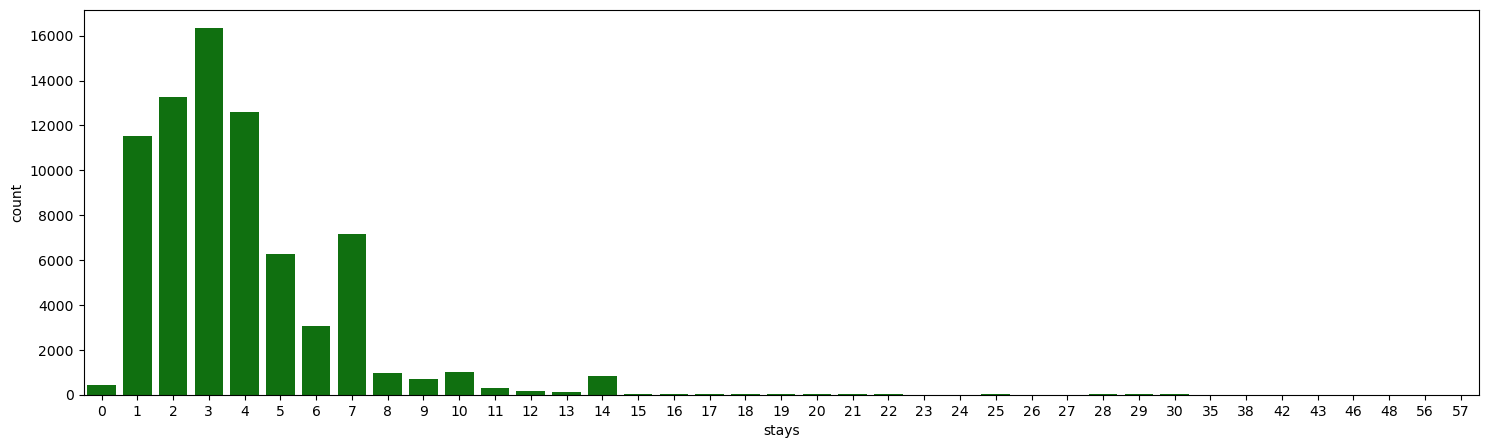

In [53]:
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='g')
plt.show()

#### Percentage of people who canceled their reservastion

is_canceled
0    0.70079
1    0.29921
Name: proportion, dtype: float64


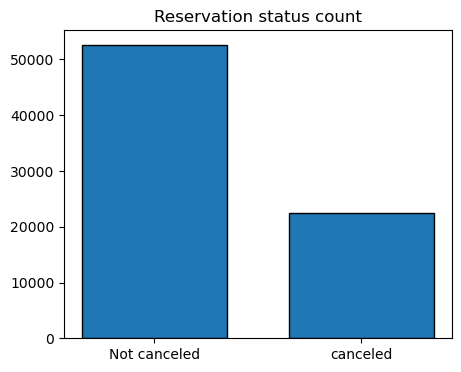

In [54]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

([<matplotlib.patches.Wedge at 0x15ef21b9550>,
 [Text(-0.8883114209291625, -0.6487702362522594, 'Not Canceled'),
  Text(0.8883114209291626, 0.6487702362522593, 'Canceled')],
 [Text(-0.48453350232499764, -0.35387467431941416, '70.1%'),
  Text(0.4845335023249977, 0.3538746743194141, '29.9%')])

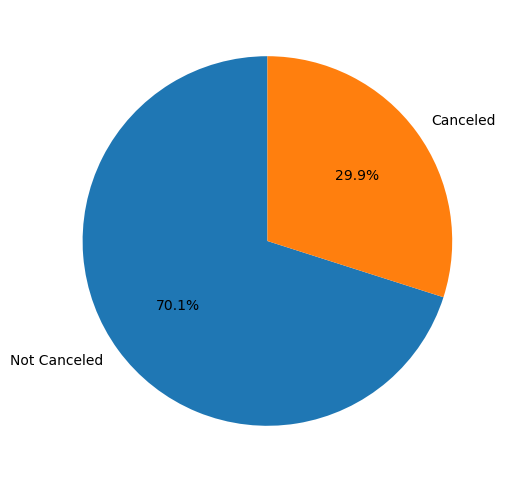

In [55]:
num_can= df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

#### Distribution plot of the rate actually paid

C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


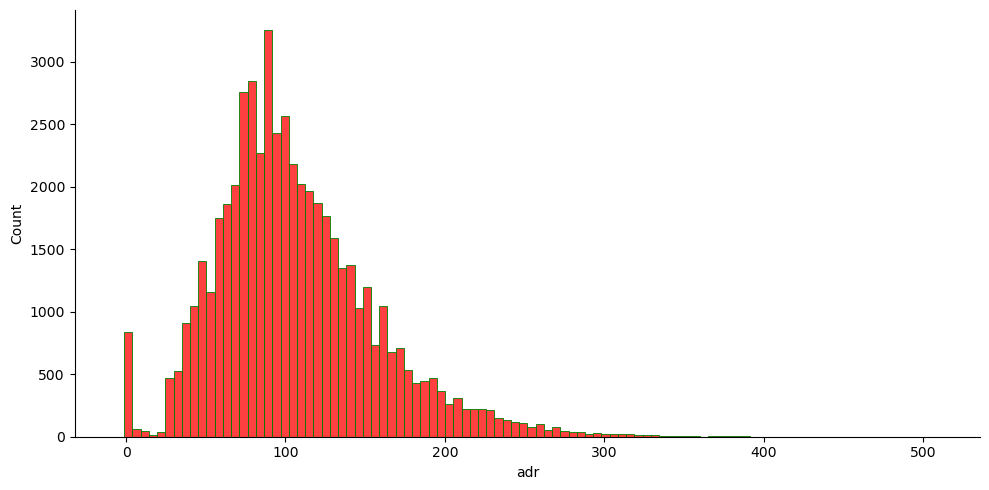

In [56]:
sns.displot(data = df[df['is_canceled'] == 0], x = 'adr', height = 5, aspect= 2, bins = 100, color = 'r', edgecolor = 'g')

#### Joint Plot

C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packag

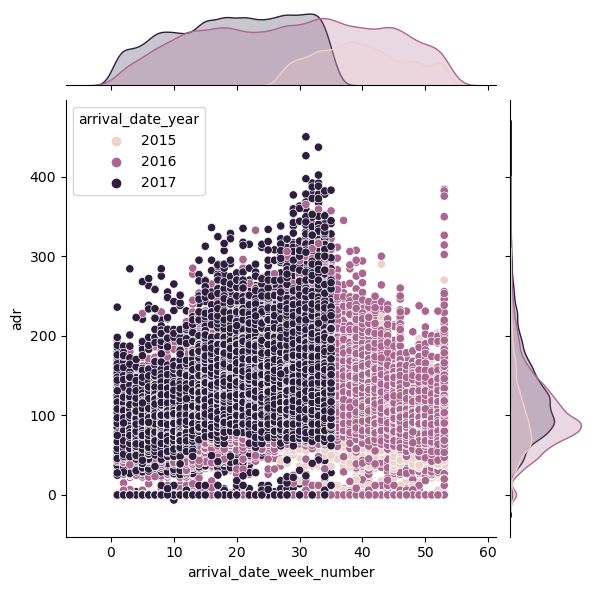

In [57]:
sns.jointplot( data = df[df['adr']<500], x = 'arrival_date_week_number' , y ='adr' , hue = 'arrival_date_year')

#### Pair Plot

C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: Whe

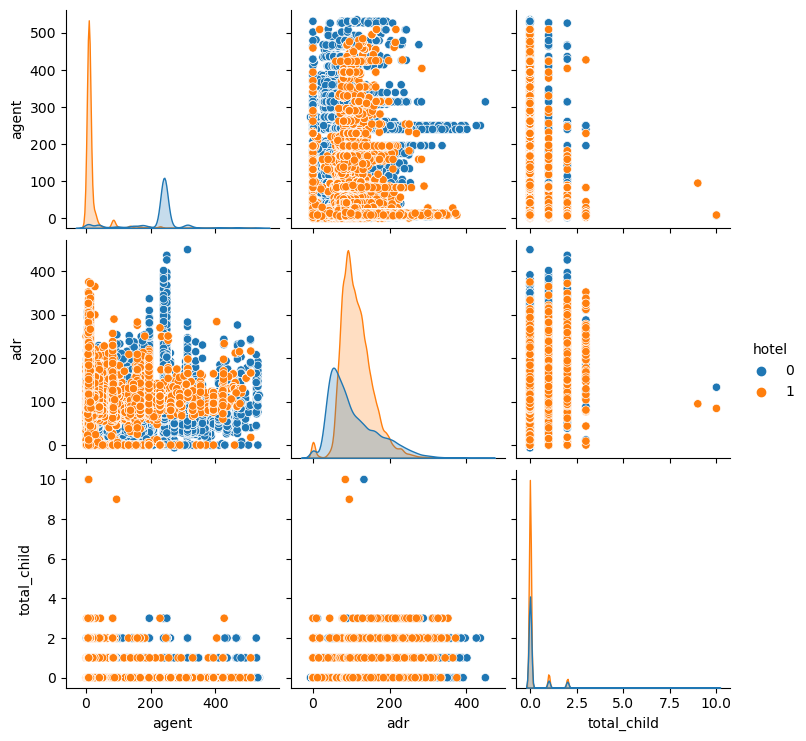

In [58]:
# df['agent'][df['agent'].isnull()] = df['agent'].mean()
# df.isnull().sum()
df['total_child'] = df['children'] + df['babies'] 
sns.pairplot(data = df[df['adr']<500][['hotel', 'agent', 'adr', 'total_child']], hue ='hotel')

In [59]:
resort_guests = df['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,8,10210
1,7,9169
2,5,7227
3,6,6999
4,4,6915
5,3,6265
6,9,5855
7,10,5605
8,2,4915
9,12,4202


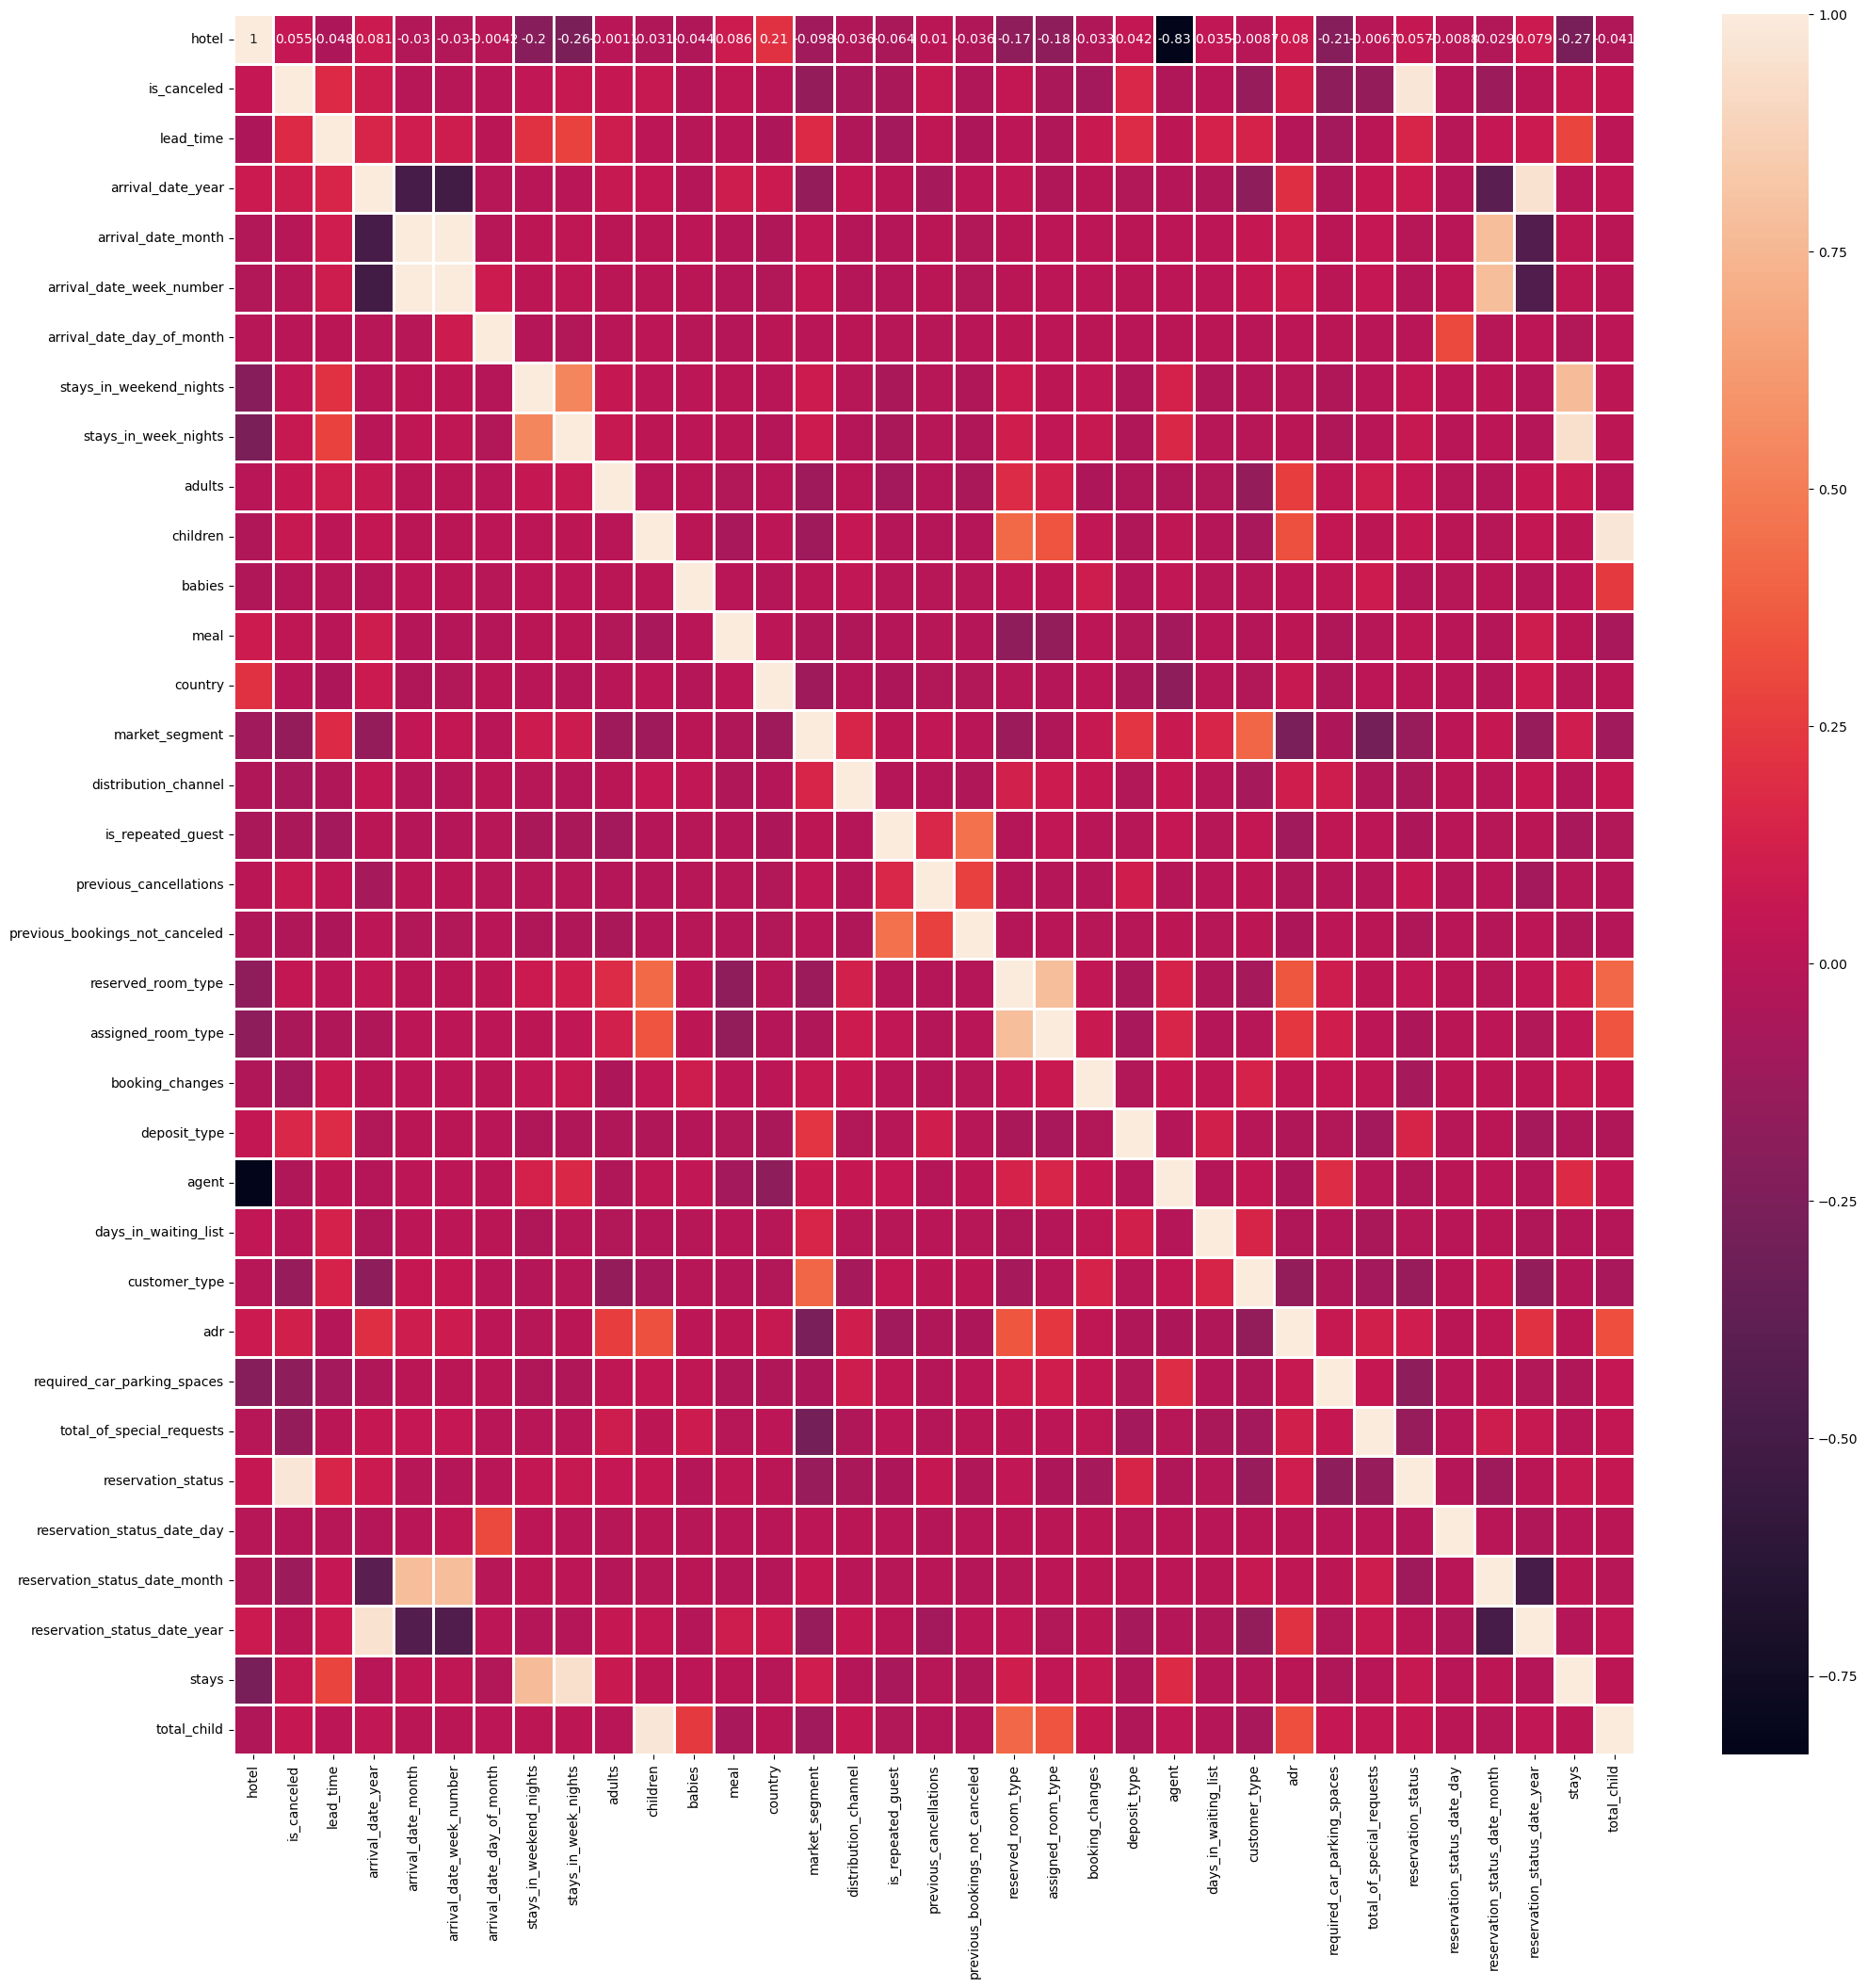

In [60]:
plt.figure(figsize = (24, 24))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

## Scaling data

In [61]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date_day',
       'reservation_status_date_month', 'reservation_status_date_year',
       'stays', 'total_child'],
      dtype='object')

In [62]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [63]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_month,reservation_status_date_year,stays,total_child
3,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,304.0,0,0,75.0,0,0,0,2,7,2015,1,0.0
4,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,1,1,0,0,0,0,0,0,0,240.0,0,0,98.0,0,1,0,3,7,2015,2,0.0
7,0,9,2015,7,27,1,0,2,2,0.0,0,1,1,2,2,0,0,0,1,1,0,0,303.0,0,0,103.0,0,1,0,3,7,2015,2,0.0
8,0,85,2015,7,27,1,0,3,2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,240.0,0,0,82.0,0,1,1,6,5,2015,3,0.0
9,0,75,2015,7,27,1,0,3,2,0.0,0,2,1,3,1,0,0,0,2,2,0,0,15.0,0,0,105.5,0,0,1,22,4,2015,3,0.0


In [64]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date_day',
       'reservation_status_date_month', 'reservation_status_date_year',
       'stays', 'total_child'],
      dtype='object')

In [65]:
X.shape

(75071, 34)

In [66]:
y.shape

(75071,)

In [67]:
y.head()

3    0
4    0
7    0
8    1
9    1
Name: is_canceled, dtype: int64

In [68]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [69]:
X_train.shape

(60056, 34)

In [70]:
y_train.shape

(60056,)

In [71]:
X_test.shape

(15015, 34)

In [72]:
y_test.shape

(15015,)

In [73]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print(X_train)
print(X_test)

[[ 0.75460918  1.93054097  1.1351407  ...  1.18537714 -0.66116812
  -0.32838463]
 [ 0.75460918 -0.80072988  1.1351407  ...  1.18537714 -1.02651609
  -0.32838463]
 [ 0.75460918 -0.74236939 -0.32947516 ... -0.29184909 -0.29582016
  -0.32838463]
 ...
 [ 0.75460918 -0.67233681 -0.32947516 ... -0.29184909 -0.66116812
  -0.32838463]
 [-1.32518929 -0.52059954 -0.32947516 ... -0.29184909  0.06952781
  -0.32838463]
 [-1.32518929  0.17972632 -0.32947516 ... -0.29184909 -0.29582016
  -0.32838463]]
[[ 0.75460918 -0.56728793 -0.32947516 ... -0.29184909 -0.29582016
  -0.32838463]
 [-1.32518929 -0.01869934  1.1351407  ...  1.18537714  1.1655717
  -0.32838463]
 [ 0.75460918 -0.13542032 -0.32947516 ... -0.29184909 -0.66116812
  -0.32838463]
 ...
 [ 0.75460918  0.98510106  1.1351407  ...  1.18537714  1.1655717
  -0.32838463]
 [-1.32518929  0.34313569 -1.79409102 ... -1.76907533  0.43487577
  -0.32838463]
 [ 0.75460918 -0.12374822  1.1351407  ...  1.18537714  0.06952781
  -0.32838463]]


## Model Train

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 1.0
Confusion Matrix : 
[[10502     0]
 [    0  4513]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10502
           1       1.00      1.00      1.00      4513

    accuracy                           1.00     15015
   macro avg       1.00      1.00      1.00     15015
weighted avg       1.00      1.00      1.00     15015



In [75]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 1.0
Confusion Matrix : 
[[10502     0]
 [    0  4513]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10502
           1       1.00      1.00      1.00      4513

    accuracy                           1.00     15015
   macro avg       1.00      1.00      1.00     15015
weighted avg       1.00      1.00      1.00     15015



### Cool 100% accurecy on machine learning

## Let's try on ANN

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### FFNN Model Architecture

In [78]:
ffnn_model = Sequential()
ffnn_model.add(Dense(input_shape = (34,), units = 50, activation = 'relu'))
ffnn_model.add(Dense(units = 30, activation = 'relu'))
ffnn_model.add(Dense(units = 1))

### Observing layer wise details

In [79]:
ffnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 50)                  │           1,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,311 (12.93 KB)

 Trainable params: 3,311 (12.93 KB)

 Non-trainable params: 0 (0.00 B)

### Setting up the Optimizer and the Loss Function

In [80]:
ffnn_model.compile(optimizer='adam' , loss='mse', metrics = ['RootMeanSquaredError'] )

### Training the model

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [82]:
ffnn_model.fit(X_train, y_train, epochs=20, validation_data = (X_valid,y_valid))

Epoch 1/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - RootMeanSquaredError: 0.3136 - loss: 0.1204 - val_RootMeanSquaredError: 0.0899 - val_loss: 0.0081
Epoch 2/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0757 - loss: 0.0058 - val_RootMeanSquaredError: 0.0506 - val_loss: 0.0026
Epoch 3/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 0.0500 - loss: 0.0025 - val_RootMeanSquaredError: 0.0390 - val_loss: 0.0015
Epoch 4/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 0.0345 - loss: 0.0012 - val_RootMeanSquaredError: 0.0785 - val_loss: 0.0062
Epoch 5/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - RootMeanSquaredError: 0.0274 - loss: 7.6372e-04 - val_RootMeanSquaredError: 0.0170 - val_loss: 2.8766e-04
Epoch 6/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0204 - loss: 4.2920e-04 - val_RootMeanSquaredError: 0.0152 - val_loss: 2.3233e-04
Epoch 7/20
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Root

### Evaluating Model Performance on Test dataset

In [83]:
ffnn_model.evaluate(X_test,y_test)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.0064 - loss: 4.2665e-05


[3.2023632229538634e-05, 0.005658942740410566]

## Making prediction using the model

In [84]:
x_test_pred = ffnn_model.predict(X_test)
x_test_pred

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0153977e+00],
       [5.5678189e-04],
       [1.0010997e+00],
       ...,
       [7.0728362e-04],
       [9.9644923e-01],
       [5.6172907e-04]], dtype=float32)

In [85]:
x_test_prediction = []

for idx, i in enumerate(x_test_pred):
    if i > 0.5:
        x_test_prediction.append(1)
    else:
        x_test_prediction.append(0)
        
x_test_prediction

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [86]:
y_test

58124     1
35939     0
50530     1
111591    0
61680     1
         ..
88434     0
66873     1
114712    0
708       1
109620    0
Name: is_canceled, Length: 15015, dtype: int64

In [88]:
type(y_test)

pandas.core.series.Series

In [89]:
xTest = pd.Series(x_test_prediction)

In [90]:
type(xTest)

pandas.core.series.Series

In [91]:
acc_rd_clf = accuracy_score(y_test, xTest)
conf = confusion_matrix(y_test, xTest)
clf_report = classification_report(y_test, xTest)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 1.0
Confusion Matrix : 
[[10502     0]
 [    0  4513]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10502
           1       1.00      1.00      1.00      4513

    accuracy                           1.00     15015
   macro avg       1.00      1.00      1.00     15015
weighted avg       1.00      1.00      1.00     15015



In [94]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,x_test_prediction))
print ("MSE:",metrics.mean_squared_error(y_test,x_test_prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,x_test_prediction)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


The Mean Absolute Error is 0 which is nothing which shows that the model is almost as the actual values.

In [95]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,x_test_prediction) #This shows our model predict %93 of the target correctly

1.0

#### Cool we got 100% accuracy on ANN regression